In [ ]:
# * This Assignment has been done by Palash Goyal, with reference to the application at Auto1 Group. 
# ** Kindly request for approval before any kind of personal use.
# Palash Goyal - palashgoyal1@gmail.com

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
auto_ = pd.read_csv('auto.csv',sep=',', header=None)

In [3]:
auto_.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
col_names = ['symboling', 'normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style','drive_wheels',
             'engine_location','wheel_base','length','width','height', 'curb_weight', 'engine_type', 'num_of_cylinders',
             'engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg',
             'highway_mpg','price']


In [5]:
auto_.columns = col_names

In [6]:
auto_.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [7]:
cat_vars = ['symboling', 'make','fuel_type','aspiration','num_of_doors','body_style','drive_wheels',
            'engine_location','engine_type', 'num_of_cylinders','fuel_system']
cnt_vars = [x for x in col_names if x not in cat_vars]

In [8]:
auto_.dtypes
# Checking the coloumns types

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [9]:
# Changing the type of cnts cols to numeric from object
auto_.normalized_losses = pd.to_numeric(auto_.normalized_losses, errors='coerce')
auto_.bore = pd.to_numeric(auto_.bore, errors='coerce')
auto_.stroke = pd.to_numeric(auto_.stroke, errors='coerce')
auto_.horsepower = pd.to_numeric(auto_.horsepower, errors='coerce')
auto_.peak_rpm = pd.to_numeric(auto_.peak_rpm, errors='coerce')
auto_.price = pd.to_numeric(auto_.price, errors='coerce')

In [10]:
# num_of_doors : categorical variable with 2 missing values : impute by max frequency
auto_.loc[auto_.num_of_doors=='?','num_of_doors']=auto_.num_of_doors.value_counts().index[0]

In [11]:
# removing 4 entries with missing values for Price variable
auto_ = auto_[auto_.price.notnull()]

In [12]:
auto_.reset_index(drop=True, inplace=True)

In [13]:
# imputing cnts cols
auto_.loc[auto_.bore.isnull() , 'bore'] = auto_.bore.mean()
auto_.loc[auto_.stroke.isnull() , 'stroke'] = auto_.stroke.mean()
auto_.loc[auto_.horsepower.isnull() , 'horsepower'] = np.ceil(auto_.horsepower.mean())
auto_.loc[auto_.peak_rpm.isnull() , 'peak_rpm'] = np.ceil(auto_.peak_rpm.mean())

In [14]:
# This is not the right approach, but keeping it as of now!
auto_.loc[auto_.normalized_losses.isnull() , 'normalized_losses'] = auto_.normalized_losses.mean()

In [15]:
# Checking count of Missing values in each column
#len(auto_.index)-auto_.count()

In [16]:
# Creating target variable on the basis of the rating of the cars
auto_.loc[auto_.symboling<=0,'target'] = 1  # Safe car
auto_.loc[auto_.symboling>0,'target'] = 0  # Risky car

/group/research/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


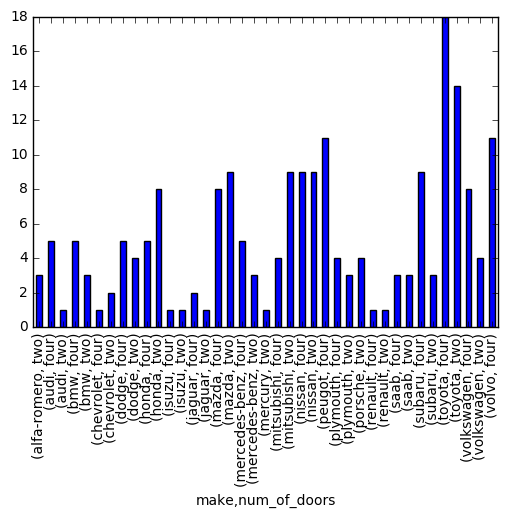

In [17]:
auto_.groupby(['make','num_of_doors']).size().plot(kind='bar')

In [18]:
# Handling the Categorical variables :
# Checking the frequencies of the Categorical variables, and labeling the entries with 'others' category which are
#     occurring lesser than 5% of the total number of cases (as of now 201 cases)

#[ 'make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_location','engine_type', 'num_of_cylinders', 'fuel_system']

In [19]:
auto_.make.value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
saab              6
audi              6
porsche           4
chevrolet         3
alfa-romero       3
jaguar            3
isuzu             2
renault           2
mercury           1
Name: make, dtype: int64

In [20]:
auto_.fuel_type.value_counts()

gas       181
diesel     20
Name: fuel_type, dtype: int64

In [21]:
auto_.aspiration.value_counts()

std      165
turbo     36
Name: aspiration, dtype: int64

In [22]:
auto_.num_of_doors.value_counts()

four    115
two      86
Name: num_of_doors, dtype: int64

In [23]:
auto_.body_style.value_counts()

sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body_style, dtype: int64

In [24]:
auto_.drive_wheels.value_counts()  # 4wd being the only value will anyways alone fall in the 'others' category

fwd    118
rwd     75
4wd      8
Name: drive_wheels, dtype: int64

In [25]:
auto_.engine_location.value_counts() # Same case as above

front    198
rear       3
Name: engine_location, dtype: int64

In [26]:
auto_.engine_type.value_counts()  # Same case as above

ohc      145
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
Name: engine_type, dtype: int64

In [27]:
auto_.num_of_cylinders.value_counts() 

four      157
six        24
five       10
two         4
eight       4
three       1
twelve      1
Name: num_of_cylinders, dtype: int64

In [28]:
auto_.fuel_system.value_counts() 

mpfi    92
2bbl    64
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuel_system, dtype: int64

In [29]:
# Dataframes for grouping mapping

# Grouping variables from above observation:
var_gp = ['make', 'body_style', 'num_of_cylinders' , 'fuel_system' ]
# Selecting only these variables from the DataFrame
auto_var_gp = auto_[var_gp]

#auto_make
# auto_.make.value_counts()
make_  = ['toyota', 'nissan', 'mazda', 'mitsubishi', 'honda', 'subaru', 'volkswagen', 'volvo', 'peugot']
others_ = ['others']*13
make_.extend(others_)
auto_make = pd.concat([pd.DataFrame( make_ , columns = ['make1']), 
                       pd.DataFrame( list(auto_.make.value_counts().index), columns = ['make'])], axis=1)

#auto_body_style
# auto_.body_style.value_counts()
body_style_  = ['sedan', 'hatchback', 'wagon', 'others', 'others']
auto_body_style = pd.concat([pd.DataFrame( body_style_ , columns = ['body_style1']), 
                       pd.DataFrame( list(auto_.body_style.value_counts().index), columns = ['body_style'])], axis=1)

#auto_num_of_cylinders
# auto_.num_of_cylinders.value_counts()
num_of_cylinders_  = ['four', 'six', 'five', 'others', 'others','others', 'others']
auto_num_of_cylinders = pd.concat([pd.DataFrame( num_of_cylinders_ , columns = ['num_of_cylinders1']), 
                       pd.DataFrame( list(auto_.num_of_cylinders.value_counts().index), columns = ['num_of_cylinders'])], axis=1)

#auto_fuel_system
# auto_.fuel_system.value_counts()
fuel_system_  = ['mpfi', '2bbl', 'idi', '1bbl', 'others','others','others','others']
auto_fuel_system = pd.concat([pd.DataFrame( fuel_system_ , columns = ['fuel_system1']), 
                       pd.DataFrame( list(auto_.fuel_system.value_counts().index), columns = ['fuel_system'])], axis=1)

In [30]:
# Map the new groups for to_be_grouped categorical variables
auto_var_gp1 = pd.merge(auto_var_gp,auto_make, on = ['make'], how = 'left')
auto_var_gp1 = pd.merge(auto_var_gp1,auto_body_style, on = ['body_style'], how = 'left')
auto_var_gp1 = pd.merge(auto_var_gp1,auto_num_of_cylinders, on = ['num_of_cylinders'], how='left')
auto_var_gp1 = pd.merge(auto_var_gp1,auto_fuel_system, on = ['fuel_system'], how='left')

# pd.merge(data_var_gp,df_pw, on = ['payment_way'])['payment_way_new'].value_counts()

In [31]:
auto_var_gp1.head()

,make,body_style,num_of_cylinders,fuel_system,make1,body_style1,num_of_cylinders1,fuel_system1
0,alfa-romero,convertible,four,mpfi,others,others,four,mpfi
1,alfa-romero,convertible,four,mpfi,others,others,four,mpfi
2,alfa-romero,hatchback,six,mpfi,others,hatchback,six,mpfi
3,audi,sedan,four,mpfi,others,sedan,four,mpfi
4,audi,sedan,five,mpfi,others,sedan,five,mpfi


In [32]:
# Keep only new grouped categories
auto_var_gp1 = auto_var_gp1.drop(auto_var_gp.columns, axis=1)

# Keep old column names for new grouped variables
auto_var_gp1.columns = auto_var_gp.columns

# Replace old to_be_grouped variables with the new grouping variables
auto_[var_gp] = auto_var_gp1

In [33]:
auto1 = auto_
# Saving DF before split into dummies in another DF for any exploration

In [34]:
auto_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 27 columns):
symboling            201 non-null int64
normalized_losses    201 non-null float64
make                 201 non-null object
fuel_type            201 non-null object
aspiration           201 non-null object
num_of_doors         201 non-null object
body_style           201 non-null object
drive_wheels         201 non-null object
engine_location      201 non-null object
wheel_base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb_weight          201 non-null int64
engine_type          201 non-null object
num_of_cylinders     201 non-null object
engine_size          201 non-null int64
fuel_system          201 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    201 non-null float64
horsepower           201 non-

In [35]:
# Making dummy variables from the categorical variables now:
auto_ = pd.get_dummies(auto_)
auto_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 57 columns):
symboling                  201 non-null int64
normalized_losses          201 non-null float64
wheel_base                 201 non-null float64
length                     201 non-null float64
width                      201 non-null float64
height                     201 non-null float64
curb_weight                201 non-null int64
engine_size                201 non-null int64
bore                       201 non-null float64
stroke                     201 non-null float64
compression_ratio          201 non-null float64
horsepower                 201 non-null float64
peak_rpm                   201 non-null float64
city_mpg                   201 non-null int64
highway_mpg                201 non-null int64
price                      201 non-null float64
target                     201 non-null float64
make_honda                 201 non-null float64
make_mazda                 201 non-null f

In [36]:
# Removing 'symboling' here:  (For this use case)
auto_ = auto_.drop('symboling', 1)

In [37]:
# Checking for any NULL values as of now
null_vals = auto_.isnull().sum()
null_vals[null_vals>0]

Series([], dtype: int64)

In [38]:
auto_y = auto_[['target']]
# target1 = auto_y
auto_x= auto_[[x for x in auto_.columns if x not in 'target']]

In [39]:
print auto_y.shape
print auto_x.shape

(201, 1)
(201, 55)


In [40]:
auto_y.to_csv('auto_y.csv')
auto_x.to_csv('auto_x.csv')